# Digit Classification with KNN and Naive Bayes

In this project, I implemented my own image recognition system for classifying digits.

Links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Tensorflow tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
conda update jupyter

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - jupyter


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    backports.functools_lru_cache-1.6.1|     pyhd3eb1b0_0          12 KB
    conda-4.9.2                |   py38hecd8cb5_0         2.9 MB
    ------------------------------------------------------------
                                           Total:         2.9 MB

The following packages will be UPDATED:

  conda                                4.9.1-py38hecd8cb5_0 --> 4.9.2-py38hecd8cb5_0

The following packages will be DOWNGRADED:

  backports.functoo~                             1.6.1-py_0 --> 1.6.1-pyhd3eb1b0_0



backports.functools_ | 12 KB     | ##################################### | 100% 
conda-4.9.2          | 2.9 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying tr

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import math as math
import numpy as np 
import pandas as pd 
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from math import log

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

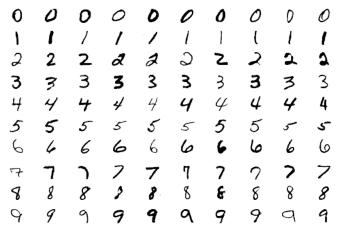

In [4]:
def P1(num_examples=10):

    #List of actual numbers 
    reference = np.unique(Y) #List of 10 numbers, ranging 0 through 9
    
    #Set up arrays to store list of numbers 
    num_features = [0, 784]
    store = np.empty(num_features)
    
    #Iterate through and create list of handwritten numbers
    for i in range(len(reference)): 
        match = (reference[i] == Y)
        example = X[match]
        example_list = example[:num_examples]
        store = np.append(store, example_list, axis = 0)
    
    #Iterate through and plot grid of handwritten numbers (10x10)
    for j in range(100):   
        reshaped = store[j].reshape((28,28))
        plt.subplot(10, 10, j+1)
        plt.imshow(reshaped, cmap='Greys')
        plt.axis('off')
    plt.show()
    

P1(10)


### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [5]:
def P2(k_values):

    
    #Iterate through k_values to show performance of each model
    for i in k_values:
        #Create k-nearest neighbor model 
        model = KNeighborsClassifier(n_neighbors = i)
        #Train on mini train set 
        model.fit(mini_train_data, mini_train_labels)
        #Evaluate performance on dev set
        predict = model.predict(dev_data)
        print((model.score(dev_data, dev_labels))*100) 
        #Get precision, recall, and F1 results 
        print(classification_report(dev_labels, predict))

#List of varying k values 
k_values = [1, 3, 5, 7, 9]
P2(k_values)

88.4
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

87.6
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       106
           1       0.82      0.98      0.90       118
           2       0.90      0.78      0.84       106
           3  

ANSWER: For k=1 nearest neighbors, 9 had the lowest precision(predictions correct), while 8 had the lowest recall(positive cases caught) and f1 scores (positive predictions correct). 8 is the most difficult digit because it  has the lowest f1 score, which takes into account both false positives and false negatives. 

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [6]:
#List of varying train sizes 
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
#Empty list to store accuracy values in after running for loop
accuracies = []

def P3(train_sizes, accuracies):
    
    #Empty list to store time elapsed values in after running for loop 
    time_elapsed = []
    
    #For loop finding accuracies and time elapsed to find accuracies for each train size
    for j in train_sizes:
        t0= time.process_time()
        #Create k-nearest neighbor model 
        model_1 = KNeighborsClassifier(n_neighbors = 1)
        #Train on train set 
        model_1.fit(train_data[:j], train_labels[:j])
        #Evaluate performance on dev set
        predict = model_1.predict(dev_data)
        score = model_1.score(dev_data, dev_labels)
        accuracies = np.append(accuracies, score)
        #Measure elapsed time of operations
        t1 = time.process_time() - t0
        time_elapsed = np.append(time_elapsed, t1)

    print("Time elapsed: ", time_elapsed)
    print("Accuracies: ", accuracies)


P3(train_sizes, accuracies)

Time elapsed:  [ 0.263492  0.474475  0.936738  1.865864  3.761998  7.518224 15.110167
 30.607985 62.823972]
Accuracies:  [0.702 0.791 0.811 0.866 0.905 0.927 0.939 0.952 0.963]


### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

Predicted accuracies:  [[  780.14939921]
 [ 1559.92971594]
 [12996.70769471]]
Improved predicted accuracies:  [[0.51206949]
 [0.52107786]
 [0.54863352]]
R2:  -2349350.1228649025
R2 Improved:  0.8849371814264908


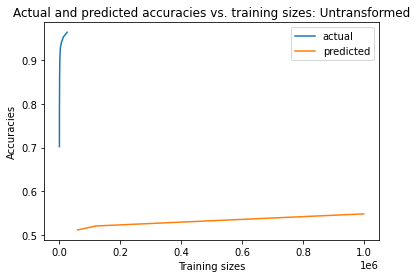

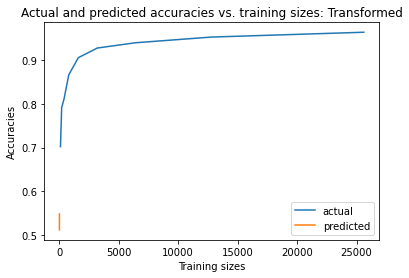

In [7]:
#List of accuracies of 1-Nearest Neighbor Model given varying train sizes below 
accuracies = [0.702, 0.791, 0.811, 0.866, 0.905, 0.927, 0.939, 0.952, 0.963]

#List of varying train sizes 
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]

def P4():

# Notes to self 
# train on accuracies of 7 examples in problem 3, then test data =  3 new sizes of data 
# transformed data = train on examples so that data makes sense (not log, still exceeds 100%) - transform 1 axis 
# odds ratio - doesn't exceed 1 
        
        #Odds ratio for accuracies
        new_accuracies = []
    
        for m in accuracies:
            odds_ratio = m/(1+m)
            new_accuracies.append(odds_ratio)
        
        #print(new_accuracies)
        
        #Log transform values because relationship is not linear 
        log_train_sizes = np.log(train_sizes)
        log_train_sizes

        reshape_train_size = np.array(log_train_sizes).reshape(-1,1)
        reshape_accuracies = np.array(new_accuracies).reshape(-1,1)
        
        reshape_train_size_original = np.array(train_sizes).reshape(-1,1)
        reshape_accuracies_original = np.array(accuracies).reshape(-1,1)
        
        #Create linear regression model 
        model_2 = LinearRegression()
        
        #Train on P3 accuracies  
        model_2.fit(reshape_train_size, reshape_accuracies)
        
        #P4 test data 
        p4_test = np.array([60000, 120000, 1000000]).reshape(-1,1)
        log_p4_test = np.log(p4_test)
        
        #Evaluate performance on new accuracies
        predict = model_2.predict(p4_test)
        print("Predicted accuracies: ", predict)
        new_predict = model_2.predict(log_p4_test)
        print("Improved predicted accuracies: ", new_predict)
        
        #Calculate R^2
        r2_1 = (model_2.score(reshape_train_size_original, reshape_accuracies_original)) 
        r2_2 = (model_2.score(reshape_train_size, reshape_accuracies))
        print("R2: ", r2_1)
        print("R2 Improved: ", r2_2)
       
        #Lineplot 1
        x1 = train_sizes
        y1 = accuracies
        # plotting the line 1 points 
        plt.plot(x1, y1, label = "actual")
        # line 2 points
        x2 = p4_test
        y2 = new_predict
        # plotting the line 2 points 
        plt.plot(x2, y2, label = "predicted")
        plt.xlabel('Training sizes')
        # Set the y axis label of the current axis.
        plt.ylabel('Accuracies')
        # Set a title of the current axes.
        plt.title('Actual and predicted accuracies vs. training sizes: Untransformed')
        # show a legend on the plot
        plt.legend()
        # Display figure
        plt.show()
    
    
        #Lineplot 2
        x1 = train_sizes
        y1 = accuracies
        # plotting the line 1 points 
        plt.plot(x1, y1, label = "actual")
        # line 2 points
        x2 = log_p4_test
        y2 = new_predict
        # plotting the line 2 points 
        plt.plot(x2, y2, label = "predicted")
        plt.xlabel('Training sizes')
        # Set the y axis label of the current axis.
        plt.ylabel('Accuracies')
        # Set a title of the current axes.
        plt.title('Actual and predicted accuracies vs. training sizes: Transformed')
        # show a legend on the plot
        plt.legend()
        # Display figure
        plt.show()


train_sizes_2 = [60000, 120000, 1000000]
P4()

ANSWER: The values for the new training sizes are so large, a log needs to be taken and an odds ratio used for the data to be normalized.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

0.884
[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


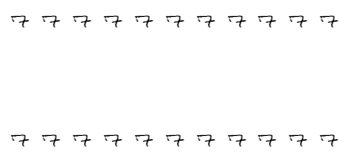

In [8]:
def P5():

    #Create k-nearest neighbor model 
    model = KNeighborsClassifier(n_neighbors = 1)
    #Train on mini train set 
    model.fit(mini_train_data, mini_train_labels)
    #Evaluate performance on dev set
    predict = model.predict(dev_data)
    print(model.score(dev_data, dev_labels)) 
    #Build confusion matrix 
    print(confusion_matrix(dev_labels, predict))
        
    #Show most confused digits  
    
    def find(num_examples=11):


        #List of actual numbers 
        f_and_n = [4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
        #reference_2 = (np.unique(Y) = f_and_n)
        #print(reference_2)
    
        #Set up arrays to store list of numbers 
        num_features = [0, 784]
        store = np.empty(num_features)
    
        #Iterate through and create list of handwritten numbers
        for i in range(len(f_and_n)): 
            example_2 = X[f_and_n]
            example_list = example_2[:num_examples]
            store = np.append(store, example_list, axis = 0)
    
        #Iterate through and plot grid of handwritten numbers
        for j in range(22): 
            reshaped = store[j].reshape((28,28))
            plt.subplot(2, 11, j+1)
            plt.imshow(reshaped, cmap='Greys')
            plt.axis('off')
        plt.show()

    find(11)
    

P5()

ANSWER: The digits 4 and 9 are confused the most (11 times). 

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [9]:
#Blur function to blur 8 pixels around center pixel, and x number of pixels around edge pixels
def blur(number):
    normal = number.reshape(28,28)
    filtered = np.zeros((28,28))
    for i in range(28):
        for j in range(28): 
            if i == 0:
                #Top left corner pixel
                if j == 0:
                    filtered[i,j] = np.sum(normal[i:i+1, j:j+1])/4
                #Top right corner pixel
                elif j == 27:
                    filtered[i,j] = np.sum(normal[i:i+1, j-1:j])/4
                #All other pixels in top row
                else: 
                    filtered[i,j] = np.sum(normal[i:i+1, j-1:j+1])/6
            elif i == 28:
                #Bottom left corner pixel
                if j == 0:
                    filtered[i,j] = np.sum(normal[i-1:i, j:j+1])/4
                #Bottom right corner pixel
                elif j == 27:
                    filtered[i,j] = np.sum(normal[i-1:i, j-1:j])/4
                #All other pixels in bottom row
                else: 
                    filtered[i,j] = np.sum(normal[i-1:i, j-1:j+1])/4
            else:
                #All other pixels 
                if j == 0:
                    filtered[i,j] = np.sum(normal[i-1:i+j, j:j+1])/6
                elif j == 27:
                    filtered[i,j] = np.sum(normal[i-1:i+j, j-1:j])/6
                else: 
                    filtered[i,j] = np.sum(normal[i-1:i+j, j-1:j+1])/9
    
    return filtered.reshape(784,)
    

In [10]:
#Blur filter application to data
def blur_apply(data):
    #Empty list for filtered data 
    filt_data = np.array([])
    #for loop applying blur for each input 
    for value in data:
        blur_applied = blur(value)
        filt_data = np.append(filt_data, blur_applied)
    filt_data_reshaped = filt_data.reshape(1000, 784)
        
    #Reshape filtered data
    return filt_data_reshaped

In [11]:
def P6():
    

#Gaussian blur: take pixel, take average of x # of pixels around it, ends at 1 -- blurs

    #3x3 Gaussian filter 
    blurred_mini_train_data = blur_apply(mini_train_data)
    
    blurred_dev_data = blur_apply(dev_data)
    
    #Normal model 
        #Create k-nearest neighbor model 
    model_3 = KNeighborsClassifier(n_neighbors = 1)
        #Train on mini train set 
    model_3.fit(mini_train_data, mini_train_labels)
        #Evaluate performance on dev set
    predict = model_3.predict(dev_data)
        
    score = model_3.score(dev_data, dev_labels)
    
    #Filter the training data but not the dev data
        #Create k-nearest neighbor model 
    model_3 = KNeighborsClassifier(n_neighbors = 1)
        #Train on mini train set 
    model_3.fit(blurred_mini_train_data, mini_train_labels)
        #Evaluate performance on dev set
    predict = model_3.predict(blurred_dev_data)
        
    score_blurred_mini_train_data = model_3.score(dev_data, dev_labels)
    
    #Filter the dev data but not the training data
        #Create k-nearest neighbor model 
    model_3 = KNeighborsClassifier(n_neighbors = 1)
        #Train on mini train set 
    model_3.fit(mini_train_data, mini_train_labels)
        #Evaluate performance on dev set
    predict = model_3.predict(blurred_dev_data)
        
    score_blurred_dev_data = model_3.score(blurred_dev_data, dev_labels)
        
    #Filter both training data and dev data
        #Create k-nearest neighbor model 
    model_3 = KNeighborsClassifier(n_neighbors = 1)
        #Train on mini train set 
    model_3.fit(blurred_mini_train_data, mini_train_labels)
        #Evaluate performance on dev set
    predict = model_3.predict(blurred_dev_data)
        
    score_both_blurred = model_3.score(blurred_dev_data, dev_labels)
    
    print("Accuracy no filter: ", score)
    print("Accuracy mini_train_set filter: ", score_blurred_mini_train_data)
    print("Accuracy dev_set filter: ", score_blurred_dev_data)
    print("Accuracy mini_train_set and dev_set filter: ", score_both_blurred)


P6()

Accuracy no filter:  0.884
Accuracy mini_train_set filter:  0.298
Accuracy dev_set filter:  0.405
Accuracy mini_train_set and dev_set filter:  0.797


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [12]:
#Pixel values range from 0 (white) to 255 (black)
def binarize_pixels(data, threshold=0.5):
    # New array of zeros, same shape as original data
    binarized_data = np.zeros(data.shape)

    # Threshold for determining cutoffs for each feature
    for feature in range(data.shape[1]):
        binarized_data[:,feature] = data[:,feature] > threshold
    return binarized_data

# Create new binarized training and test data
binarized_mini_train_data = binarize_pixels(mini_train_data)
binarized_dev_data = binarize_pixels(dev_data)


In [13]:
# New array of zeros, same shape as original data
mapped_data = np.zeros(mini_train_data.shape)

# Threshold for determining cutoffs for each feature - represents opposite ends of likelihood 
thresholds = [0.1, 0.9]

# Apply threshold 
mapped_data[np.where(mini_train_data < thresholds[0])] = 0
mapped_data[np.where((mini_train_data >= thresholds[0]) & (mini_train_data < thresholds[1]))] = 1
mapped_data[np.where(mini_train_data >= thresholds[1])] = 2

In [14]:
def P7():


    #Bernoulli NB Model
    bnb = BernoulliNB()
    y_pred_bnb = bnb.fit(binarized_mini_train_data, mini_train_labels).predict(dev_data)
    print("Accuracy BernoulliNB: ", (bnb.score(dev_data, dev_labels))*100) 
 
    #MultinomialNB Model
    mnb = MultinomialNB()
    y_pred_mnb = mnb.fit(mapped_data, mini_train_labels).predict(dev_data)
    print("Accuracy MultinomialNB: ",(mnb.score(dev_data, dev_labels))*100) 
    
P7()

Accuracy BernoulliNB:  80.2
Accuracy MultinomialNB:  80.7


ANSWER: The Multinomial NB accounts for different features that do occur, while Bernoulli NB accounts for a single feature that does occur and also accounts for when the same feature that does not occur. The MultinomialNB does not improve the results, because the thresholds for assigning each value to a 0, 1, 2 were chosen arbitrarily (given in prompt) and not chosen based on optimal accuracy. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [18]:
import warnings
warnings.filterwarnings('ignore')

#Produce Bernoulli NB model and find best alpha out of list
def P8(alphas):
    bnb = BernoulliNB()
    gs_clf = GridSearchCV(bnb, param_grid = alphas, refit=True)
    gs_clf.fit(binarized_mini_train_data, mini_train_labels)
    y_predictions = gs_clf.predict(dev_data)
    print("GridSearchCV score:", gs_clf.cv_results_)
    print("Best alpha value:", gs_clf.best_params_)

    
alphas = {'alpha' : [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

P8(alphas)

GridSearchCV score: {'mean_fit_time': array([0.00801282, 0.00684628, 0.00643406, 0.00617986, 0.00610518,
       0.0061471 , 0.00605507, 0.0058516 , 0.00600319]), 'std_fit_time': array([6.61748939e-04, 1.47241315e-03, 8.70911220e-04, 4.95488680e-04,
       1.94859492e-04, 2.40089635e-04, 2.54557783e-04, 8.81283052e-05,
       9.83237064e-05]), 'mean_score_time': array([0.00205736, 0.00150819, 0.00149221, 0.00134902, 0.00136194,
       0.00133557, 0.00137482, 0.00138798, 0.00136542]), 'std_score_time': array([2.20745190e-04, 2.18987142e-04, 1.57522157e-04, 3.07304439e-05,
       1.54340631e-05, 2.28017925e-05, 3.18092203e-05, 6.62693179e-05,
       5.55012643e-05]), 'param_alpha': masked_array(data=[0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'alpha': 0.0}, {'alpha': 0.0001}, {'alpha': 0.001}, {'alpha': 0.01}, {'alpha

ANSWER: The best value for alpha is 0.001. As the alpha value approaches 0, you get better accuracies overall. This makes sense because the alpha value is not completely equal to 0, which would mean no smoothing, but there is enough smoothing that there is no overfitting. 

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [16]:
def P9():


    #Before fix
    gnb = GaussianNB()
    y_pred_gnb = gnb.fit(mini_train_data, mini_train_labels).predict(dev_data)
    print("GaussianNB accuracy before fix:", (gnb.score(dev_data, dev_labels))*100) 
    print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0], (dev_labels != y_pred_gnb).sum()))

    bnb = BernoulliNB()
    y_pred_bnb = bnb.fit(mini_train_data, mini_train_labels).predict(dev_data)
    print("BernoulliNB accuracy :", (bnb.score(dev_data, dev_labels))*100) 
    print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0], (dev_labels != y_pred_bnb).sum()))
    
    #After fix
    #After fix
    smoothed_gnb = GaussianNB(var_smoothing=0.1)
    y_pred_smoothed_gnb = smoothed_gnb.fit(mini_train_data, mini_train_labels).predict(dev_data)
    print("GaussianNB accuracy after fix:", (smoothed_gnb.score(dev_data, dev_labels))*100) 
    print("Number of mislabeled points out of a total %d points : %d" % (dev_data.shape[0], (dev_labels != y_pred_smoothed_gnb).sum()))
    


P9()

GaussianNB accuracy before fix: 59.3
Number of mislabeled points out of a total 1000 points : 407
BernoulliNB accuracy : 80.9
Number of mislabeled points out of a total 1000 points : 191
GaussianNB accuracy after fix: 81.69999999999999
Number of mislabeled points out of a total 1000 points : 183


ANSWER: Theta is the mean of each feature per class and sigma is the variance of each feature per class in Gaussian NB. Because Gaussian NB assumes that each one of the descriptive features follows a normal distribution, the var_smoothing parameter can transform on each feature to make it more or less normally distributed by adding a portion of the largest sigma to each of the sigmas. In this case, var_smoothing=0.1 alters sigma to normalize the distribution and generalize more accurately. 

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

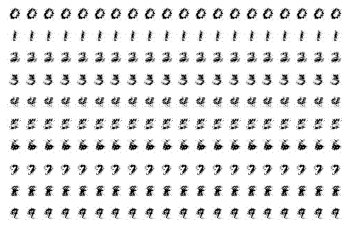

In [17]:
def P10(num_examples):


    #Create Bernoulli Naive Bayes model 
    rows = 0
    bnb = BernoulliNB(binarize = 0.0)
    fitted = bnb.fit(mini_train_data, mini_train_labels)
    #Estimated probability of each pixel being 0 or 1 
    pixel_prob = np.exp(fitted.feature_log_prob_)

    #Randomly generated number examples from a uniform distribution 
    X = np.random.rand(num_examples, 784)
    #Actual numbers 
    Y = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
    
    #for loop outputting generated numbers
    for i in range(len(Y)):
        output = pixel_prob[i] > X
        
        for j in range(num_examples):   
            #Plot 
            rows +=1
            plt.subplot(10, num_examples, rows)
            plt.imshow(output[i].reshape(28,28), cmap='Greys')
            plt.axis('off')
    
    plt.show()

P10(20)

ANSWER: Compared to the training data images from Part 1, the generated data images are more blurry and difficult to read. 